# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
def research(data_file):
    display(data_file.head())
    display(data_file.info())
    display(data_file.describe())

In [4]:
research(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00","23,613.00","21,796.00","23,699.00","21,421.00","12,180.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


### Вывод

Видим в таблице 22 колонки и 23699 строк, типы данных представлены `int64`, `float64`, `object` и `bool`.

Количество значений в колонках различается, значит, **в данных есть пропущенные значения**.

## Предобработка данных

**Проверка стиля заголовков.**

In [5]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Стиль заголовков колонок `cityCenters_nearest`, `parks_around3000`, `ponds_around3000` не соответствует общему стилю. Переименуем колонки.

In [6]:
df.rename(columns={'cityCenters_nearest':'city_сenters_nearest',
                  'parks_around3000':'parks_around_3000',
                  'ponds_around3000':'ponds_around_3000'},
          inplace=True)

**Проверим наличие дубликатов**

In [7]:
df.duplicated().sum()

0

Дубликатов в таблице нет

**Обработка пропусков и изменение типа данных**

Выведем количество пропусков в каждой колонке

In [8]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_сenters_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
df.isna().mean()*100

total_images            0.00
last_price              0.00
total_area              0.00
first_day_exposition    0.00
rooms                   0.00
ceiling_height         38.80
floors_total            0.36
living_area             8.03
floor                   0.00
is_apartment           88.29
studio                  0.00
open_plan               0.00
kitchen_area            9.61
balcony                48.61
locality_name           0.21
airports_nearest       23.38
city_сenters_nearest   23.29
parks_around_3000      23.28
parks_nearest          65.91
ponds_around_3000      23.28
ponds_nearest          61.56
days_exposition        13.42
dtype: float64

В 14 колонках из 22 видим пропуски данных.

Разделим колонки на 4 группы в зависимости от объекта который они описывают:
1. Объявление: 
    - `total_images` — число фотографий квартиры в объявлении
    - `first_day_exposition` — дата публикации
    - `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
2. Цена:
    - `last_price` — цена на момент снятия с публикации
3. Объект:
    - `total_area` — площадь квартиры в квадратных метрах (м²)
    - `rooms` — число комнат
    - `ceiling_height` — высота потолков (м)
    - `floors_total` — всего этажей в доме
    - `living_area` — жилая площадь в квадратных метрах (м²)
    - `floor` — этаж
    - `is_apartment` — апартаменты (булев тип)
    - `studio` — квартира-студия (булев тип)
    - `open_plan` — свободная планировка (булев тип)
    - `kitchen_area` — площадь кухни в квадратных метрах (м²)
    - `balcony` — число балконов
4. Местонахождение:
    - `locality_name` — название населённого пункта
    - `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
    - `cityCenters_nearest` — расстояние до центра города (м)
    - `parks_around3000` — число парков в радиусе 3 км
    - `parks_nearest` — расстояние до ближайшего парка (м)
    - `ponds_around3000` — число водоёмов в радиусе 3 км
    - `ponds_nearest` — расстояние до ближайшего водоёма (м)

**Рассмотрим данные связанные с датами в таблице**

`first_day_exposition`— дата публикации

Данные представлены в формате `object`, заменим на формат даты год-месяц-день

In [10]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')

`days_exposition` — сколько дней было размещено объявление

В колонке 3181 пропуска, возможно на момент предоставления данных, квартиры еще не были проданы и объявления не были сняты с публикации.

**Вывод**:
- В колонке `first_day_exposition` и `days_exposition` заменили тип данных на `date`, что даст возможность работать с ними как с датой.
- В колонке `days_exposition` пропуски не заполнили, что будет говорить нам о том, что эти объявления ещё не были сняты с публикации.

**Рассмотрим данные связанные с ценой объекта недвижимости last_price**

In [11]:
df['last_price'].describe()

count        23,699.00
mean      6,541,548.77
std      10,887,013.27
min          12,190.00
25%       3,400,000.00
50%       4,650,000.00
75%       6,800,000.00
max     763,000,000.00
Name: last_price, dtype: float64

Странное минимальное значение проверим его.

In [12]:
df.query('last_price<100_000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
8793,7,"12,190.00",109.00,2019-03-20,2,2.75,25.00,32.00,25,NaN,...,40.50,NaN,Санкт-Петербург,"36,421.00","9,176.00",1.00,805.00,0.00,NaN,8.00


Для площади 109 м, цена в колонке похоже указана в тысячах, исправим значение.

In [13]:
df.loc[8793, 'last_price'] = df.loc[8793, 'last_price']*1000

Проверим максимальные значения

In [14]:
df.query('last_price>250_000_000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1436,19,"330,000,000.00",190.00,2018-04-04,3,3.50,7.00,95.00,5,NaN,...,40.00,NaN,Санкт-Петербург,"23,011.00","1,197.00",3.00,519.00,3.00,285.00,233.00
12971,19,"763,000,000.00",400.00,2017-09-30,7,NaN,10.00,250.00,10,NaN,...,NaN,2.00,Санкт-Петербург,"25,108.00","3,956.00",1.00,530.00,3.00,756.00,33.00
14706,15,"401,300,000.00",401.00,2016-02-20,5,NaN,9.00,204.00,9,False,...,24.00,3.00,Санкт-Петербург,"21,912.00","2,389.00",1.00,545.00,1.00,478.00,393.00
15651,20,"300,000,000.00",618.00,2017-12-18,7,3.40,7.00,258.00,5,NaN,...,70.00,NaN,Санкт-Петербург,"32,440.00","5,297.00",0.00,NaN,2.00,198.00,111.00
19540,8,"420,000,000.00",900.00,2017-12-06,12,2.80,25.00,409.70,25,NaN,...,112.00,NaN,Санкт-Петербург,"30,706.00","7,877.00",0.00,NaN,2.00,318.00,106.00
22831,18,"289,238,400.00",187.50,2019-03-19,2,3.37,6.00,63.70,6,NaN,...,30.20,NaN,Санкт-Петербург,"22,494.00","1,073.00",3.00,386.00,3.00,188.00,NaN


Максимальные значения похоже указаны без ошибки. Так самая дорогая квартира за 763 млн находится на последнем этаже 10 этажного дома, возможно это пентхаус.

**Вывод**

При рассмотрении значения цены были обнаружены неординарные значения минимальной и максимальной цены. Значение минимальной цены было исправлено как ошибка заполнения, максимальные цены видимо реальны.

**Рассмотрим данные связанные с местонахождением объекта недвижимости**

Нам дано 7 колонок с характеристиками местоположения объекта недвижимости:
- `locality_name` — название населённого пункта
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `city_сenters_nearest` — расстояние до центра города (м)
- `parks_around_3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around_3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)

Известно, что данные включают в себя информацию о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

Пропуски обнаружены во всех колонках, так же потребуется замена типа данных. Выведем количество населенных пунктов

In [15]:
# Выведем количество и список населенных пунктов
display(df['locality_name'].nunique())

364

In [16]:
df['locality_name'].value_counts().head()

Санкт-Петербург    15721
посёлок Мурино       522
посёлок Шушары       440
Всеволожск           398
Пушкин               369
Name: locality_name, dtype: int64

В таблице представлено 364 населенных пункта, часть относятся к районам Санкт-Петербурга часть к Ленинградской области. 
На Санкт-Петербург приходится 15747(66,4%) строк таблицы. 

В колонке locality_name обнаружено 49 пропусков. Для их заполнения посмотрим насколько они удалены от центра города. При этом, например, Всеволжск относящийся к области, находится ближе к центру чем Зеленогорск, относящийся к городу.

Выведем описательную статистику пропусков в locality_name и посмотрим на их удаленность от центра

In [17]:
df.query('locality_name != locality_name')['city_сenters_nearest'].describe()

count       41.00
mean    11,278.90
std      8,910.06
min      1,322.00
25%      4,383.00
50%      8,943.00
75%     17,369.00
max     41,294.00
Name: city_сenters_nearest, dtype: float64

Выведем аналогичную информацию по Санкт-Петербургу

In [18]:
df.query('locality_name == "Санкт-Петербург"')['city_сenters_nearest'].describe()

count   15,660.00
mean    11,601.29
std      4,842.04
min        181.00
25%      8,327.00
50%     12,244.50
75%     14,943.00
max     29,493.00
Name: city_сenters_nearest, dtype: float64

Пропуски могут находится как в городе так и в области. Определим, если пропуск находится ближе чем медианное значение расстояния от центра города, то это Санкт-Петербург, остальным выставим значение unknown

- Создадим функцию которая сравнивает расстояние до центра и возвращает заданное значение. 
- Добавим в таблицу колонку с результатами работы функции.
- Заменим пропуски значениями из новой колонки и удаляем её.

In [19]:
сenter_median = df.query('locality_name == "Санкт-Петербург"')['city_сenters_nearest'].median()

In [20]:
def location(city_сenters_nearest):
    if city_сenters_nearest < сenter_median:
        return 'Санкт-Петербург'
    return 'unknown'

df['locality_name2'] = df['city_сenters_nearest'].apply(location)

df['locality_name'] = df['locality_name'].fillna(df['locality_name2'])
df = df.drop(columns = ['locality_name2'],axis = 1)

Проверим значения

In [21]:
df[df['locality_name']=="unknown"]['rooms'].count()

23

**Вывод**:
Из 49 пропусков `locality_name` мы заменили 26 на значение Санкт-Петербург и 23 остались неизвестны

Проверим расстояние до аэропорта и расстояние до центра города, где 5542 и 5519 пропуска соответственно. Поскольку самый большой по количеству значений Санкт-Петербург, то посмотрим сколько пропусков он содержит

Выведем пропуски airports_nearest по Санкт-Петербургу 

In [22]:
df.query('locality_name == "Санкт-Петербург"')['airports_nearest'].isna().sum()

85

Выведем пропуски city_сenters_nearest по Санкт-Петербургу

In [23]:
df.query('locality_name == "Санкт-Петербург"')['city_сenters_nearest'].isna().sum()

61

В обоих случаях количество пропусков не значительно, заменим пропуски на медианное значение в зависимости от населенного пункта

In [24]:
df['airports_nearest'] = (df['airports_nearest']
                          .fillna(df.groupby('locality_name')['airports_nearest']
                                  .transform('median')))

In [25]:
df['city_сenters_nearest'] = (df['city_сenters_nearest']
                          .fillna(df.groupby('locality_name')['city_сenters_nearest']
                                  .transform('median')))

Заменим значение метров на километры и округлим до десятых

In [26]:
df[['airports_nearest','city_сenters_nearest']] = (df[['airports_nearest','city_сenters_nearest']]/1000).round(1)

**Вывод**

Пропуски удаленности от аэропорта и от центра города в Санкт-Петербурге заменили на медианные значения. Остальные пропуски относятся к населенными пунктами расположенными в Ленинградской области, их не трогали.

Пропуски в колонках parks_around_3000 и ponds_around_3000 заменим на 0 и изменим тип данных на int

In [27]:
df[['parks_around_3000', 'ponds_around_3000']] = df[['parks_around_3000', 'ponds_around_3000']].fillna(0)
df[['parks_around_3000', 'ponds_around_3000']] = df[['parks_around_3000', 'ponds_around_3000']].astype(int)

Пропуски в колонках parks_nearest и ponds_nearest менять не будем

In [28]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18.90,16.00,1,482.00,2,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,12.80,18.60,0,NaN,0,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,21.70,13.90,1,90.00,2,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,28.10,6.80,2,84.00,3,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31.90,8.10,2,112.00,1,48.00,121.00


**Вывод**:

Из 23699 строк таблицы 15747(66,4%) приходится на Санкт-Петербург. По возможности пропуски были заменены на медианные значения. Значительная часть пропусков осталась не заполнена, но эти пропуски в основном относятся к объектам недвижимости Ленинградской области, где расстояние до центра и до аэропорта видимо не столь актуально.

Для заполнения пропусков можно взять карту и по очереди выписать какое поселение относится к городу, а какое к области, расстояние до центра и прочие показатели, либо где-то взять уже готовую информацию.

Также частично были изменены типы данных, метры заменены на километры с округлением до десятых долей. Это поможет сэкономить расчетные ресурсы и более понятно для восприятия информации.

**Рассмотрим данные связанные с описанием объекта недвижимости**

**ceiling_height — высота потолков (м)**

In [29]:
df['ceiling_height'].describe()

count   14,504.00
mean         2.77
std          1.26
min          1.00
25%          2.52
50%          2.65
75%          2.80
max        100.00
Name: ceiling_height, dtype: float64

Обнаружено 9195 пропусков. Кроме пропусков, в колонке `ceiling_height` так же есть явные отклонения:
 - минимальное значение высоты потолка - 1м,
 - максимальное значение высоты потолка - 100м.
 
По действующим нормам минимальная высота потолка 2,4 м. Но возможно что в некоторых нестандартных помещениях высота может опускаться до 2 метров. Все что ниже маловероятно.

Заменим значения меньше 2 м на медиану

In [30]:
df.loc[(df['ceiling_height'] < 2), 'ceiling_height'] = df['ceiling_height'].median()

Максимальное значение высоты потолка не рагламентируется. Как мы видели ранее в дорогих квартирах высота потолка достигает 3,5 метра, если это 2-х уровневая квартира, то потолок может быть 7 м.

Посмотрим на значения где потолок выше 7 метров

In [31]:
df.query('ceiling_height > 7')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
355,17,"3,600,000.00",55.20,2018-07-12,2,25.00,5.00,32.00,2,False,...,NaN,2.00,Гатчина,NaN,NaN,0,NaN,0,NaN,259.00
3148,14,"2,900,000.00",75.00,2018-11-12,3,32.00,3.00,53.00,2,NaN,...,8.00,NaN,Волхов,NaN,NaN,0,NaN,0,NaN,NaN
3474,3,"1,400,000.00",30.00,2018-03-16,1,8.00,5.00,15.30,2,False,...,7.30,NaN,деревня Нурма,NaN,NaN,0,NaN,0,NaN,125.00
4643,0,"4,300,000.00",45.00,2018-02-01,2,25.00,9.00,30.00,2,NaN,...,7.00,1.00,Санкт-Петербург,12.00,13.30,1,658.00,1,331.00,181.00
4876,7,"3,000,000.00",25.00,2017-09-27,0,27.00,25.00,17.00,17,NaN,...,NaN,2.00,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,28.00
5076,0,"3,850,000.00",30.50,2018-10-03,1,24.00,5.00,19.50,1,True,...,5.50,NaN,Санкт-Петербург,29.70,8.40,3,397.00,1,578.00,7.00
5246,0,"2,500,000.00",54.00,2017-10-13,2,27.00,5.00,30.00,3,NaN,...,9.00,2.00,деревня Мины,NaN,NaN,0,NaN,0,NaN,540.00
5669,4,"4,400,000.00",50.00,2017-08-08,2,26.00,9.00,21.30,3,NaN,...,7.00,2.00,Санкт-Петербург,29.00,10.90,1,305.00,0,NaN,267.00
5807,17,"8,150,000.00",80.00,2019-01-09,2,27.00,36.00,41.00,13,NaN,...,12.00,5.00,Санкт-Петербург,18.70,20.40,0,NaN,3,80.00,38.00
5863,20,"5,650,000.00",45.00,2018-08-15,1,8.30,16.00,19.30,14,NaN,...,8.30,1.00,Санкт-Петербург,13.10,10.80,0,NaN,1,613.00,14.00


Похоже, что при заполнении анкеты многие не там ставили запятую и например потолок высотой 2,75м превращался в 27,5м. Разделим значения больше 20 метров на 10, а пропускам и значениям больше 7 метров присвоим медиану.

In [32]:
df.loc[(df['ceiling_height'] > 20), 'ceiling_height'] = df['ceiling_height']/10
df.loc[(df['ceiling_height'] > 7), 'ceiling_height'] = df['ceiling_height'].median()
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [33]:
# Проверим пропуски ceiling_height
df['ceiling_height'].isna().sum()

0

**floors_total — всего этажей в доме**

В колонке `floors_total` обнаружено 86 пропусков. Мы не можем сказать какое количество этажей в доме, но их точно не меньше, чем тот этаж на котором находится квартира. 

Если приравняем количество этажей в доме значению `floor`, то получится, что эти квартиры находятся на последнем этаже.

Заполним пропуски значением floor и проверим пропуски floors_total

In [34]:
df['floors_total'] = df['floors_total'].fillna(df['floor'])
df['floors_total'].isna().sum()

0

**living_area — жилая площадь в квадратных метрах (м²)**

В колонке `living_area` обнаружено 1903 пропуска. 

Предположим, что доля жилой площади может зависить как от общей площади, так и от количества комнат в помещении. Для заполнения пропусков разобьем значения на группы по количеству комнат и найдем долю жилой площади в размере общей площади.

Содацим таблицу с долей жилой площади в общей площади в зависимости от количества комнат

In [35]:
living_area_share = (pd.DataFrame(df.groupby('rooms')['living_area'].median()
                                  /df.groupby('rooms')['total_area'].median()))
living_area_share.columns = ['living_area_share']
living_area_share.head()

,living_area_share
rooms,
0,0.69
1,0.48
2,0.58
3,0.62
4,0.64


Объединим 2 таблицы, заполним пропуски произведением общей площади на долю жилой площади и округлим значения, удалим уже не нужную колонку living_area_share

In [36]:
df = df.merge(living_area_share, on='rooms', how='left')

df['living_area'] = df['living_area'].fillna(df['total_area']*df['living_area_share'])
df['living_area'] = df['living_area'].round(1)

df = df.drop(columns = ['living_area_share'],axis = 1)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18.90,16.00,1,482.00,2,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,12.80,18.60,0,NaN,0,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,21.70,13.90,1,90.00,2,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14.00,98.00,9,NaN,...,NaN,0.00,Санкт-Петербург,28.10,6.80,2,84.00,3,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31.90,8.10,2,112.00,1,48.00,121.00


In [37]:
# Проверим пропуски living_area
df['living_area'].isna().sum()

0

**is_apartment — апартаменты**

20924 пропусков, это почти 90% данных. Поскольку формат аппартаментов сейчас мало распостранен, пропуск это указание, что помещение не являются аппртментами.

Заполним пропуски `is_apartment` значением `False` и проверим пропуски `living_area`

In [38]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['living_area'].isna().sum()

0

**kitchen_area — площадь кухни в квадратных метрах (м²)**

2278 пропусков. Предположим, что есть зависимость между количеством комнат и площадью кухни. Заполним пропуски медианным значением в группах в зависимости от количества комнат. Проверим пропуски.

In [39]:
df['kitchen_area'] = df['kitchen_area'].fillna(df.groupby('rooms')['kitchen_area'].transform(func='median'))
df['kitchen_area'].isna().sum()

197

Осталось 197 пропусков, посмотрим как зависят пропуски от количества комнат

In [40]:
df[df['kitchen_area'].isna()==True].groupby('rooms')['total_images'].count()

rooms
0    197
Name: total_images, dtype: int64

Все пропуски в квартирах где 0 комнат, обычно это студии, где не выделяют отдельно кухню. Заполним пропуски нулем. Проверим пропуски.

In [41]:
df['kitchen_area'] = df['kitchen_area'].fillna(0)
df['kitchen_area'].isna().sum()

0

**balcony — число балконов**

В колонке balcony 11519 пропусков. Часто наличие балкона приветствуется больше чем его отсутствие, поэтому если указать что он есть а его нет, это хуже чем наоборот. Заменим значение на 0. Проверим пропуски. Изменим тип данных на int.

In [42]:
df['balcony'] = df['balcony'].fillna(0)
df['kitchen_area'].isna().sum()
df[['last_price','floors_total','balcony']] = df[['last_price','floors_total','balcony']].astype(int)

**Вывод**:
Все пропуски в описании объекта недвижимости были заменены. 

- Для расчета жилой площади выводилось медианное значение доли жилой площади в общей, в зависимости от количества комнат в квартире. 
- Площадь кухни бралась как медиана в зависимости от количества комнат. 
- В значениях высоты потолков убрали выбросы менее 2 метров и более 7 метров, заменив их медианой. 
- Пропуски в значениях аппартаментов заменили на False. 
- Пропуски в количестве балконов заменили на 0.

Количество этажей в доме приравняли этажу квартиры.

Изменили типы данных у цены, этажей и балконов на целое значение. Что положительно отразится на производительности и на восприятии информации.

## Расчёты и добавление результатов в таблицу

Посчитайте и добавьте в таблицу
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

Рассчитаем и добавим колонку с ценой квадратного метра

In [43]:
df['price_per_meter'] = (df['last_price']/df['total_area'])
df['price_per_meter'] = df['price_per_meter'].astype(int)

Добавим колонки дня недели, месяца и года публикации объявления

In [44]:
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

Добавим тип этажа

In [45]:
def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

df['floor_type'] = df.apply(floor_type, axis=1)

Добавим колонки:
- отношение жилой и общей площади,
- отношение площади кухни к общей.

In [46]:
df['living_total_area'] = (df['living_area']/df['total_area']).round(2)
df['kitchen_total_area'] = (df['kitchen_area']/df['total_area']).round(2)

## Исследовательский анализ данных

Стоимость квартиры складывается из параметров локации и характеристик помещения. Изучим их подробнее.

Изучим данные `total_area` — площадь квартиры в квадратных метрах (м²)

In [47]:
df['total_area'].describe()

count   23,699.00
mean        60.35
std         35.65
min         12.00
25%         40.00
50%         52.00
75%         69.90
max        900.00
Name: total_area, dtype: float64

Text(0.5, 0, 'Площадь м²')

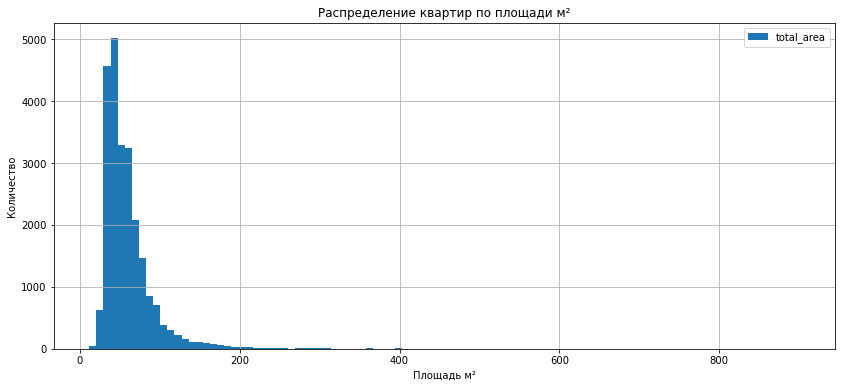

In [48]:
# Построим гистограмму
df['total_area'].hist(bins=100,legend=True,figsize=(14, 6))
plt.title("Распределение квартир по площади м²")
plt.ylabel("Количество")
plt.xlabel("Площадь м²")

В среднем площадь квартир составляет 64м², это не сильно отличается от медианы 55м². По графикам видно, что основная масса квартир приходится на площадь до 200м².

Посмотрим какие значения самые распространенные

In [49]:
df.total_area.value_counts().head(10)

45.00    419
42.00    383
60.00    347
31.00    346
44.00    345
40.00    315
43.00    301
32.00    289
46.00    282
36.00    280
Name: total_area, dtype: int64

В первую десятку объявлений больше всего входит квартир с площадью в диапазоне 42-46 метров.

**Изучим данные цены last_price**

In [50]:
df['last_price'].describe()

count        23,699.00
mean      6,542,062.62
std      10,886,992.47
min         430,000.00
25%       3,400,000.00
50%       4,650,000.00
75%       6,800,000.00
max     763,000,000.00
Name: last_price, dtype: float64

Text(0, 0.5, 'Цена 100 млн')

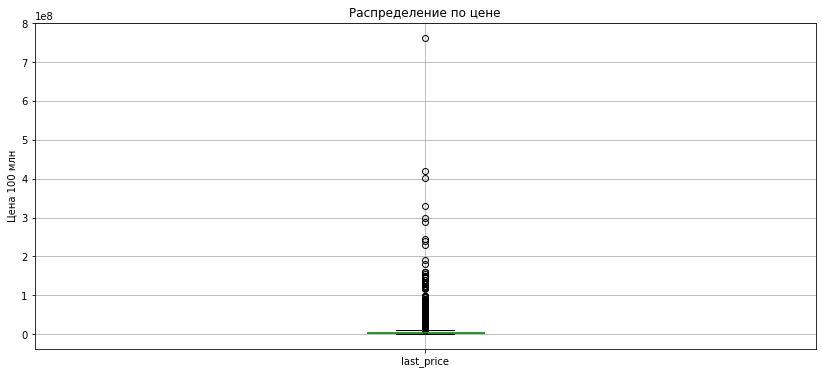

In [51]:
df.boxplot(column='last_price',figsize=(14,6))
plt.title("Распределение по цене")
plt.ylabel("Цена 100 млн")

Медиана цены приходится на 4.65 млн, а среднее значение на 6.54 млн. Показатели сильно отличаются, что является результатом выбросов, например максимальная цена 763 млн.

График цены квартир малоинформативен. Построим гистограмму с ценами до 10 млн. и проверим значения

Text(0.5, 0, 'Цена 10 млн')

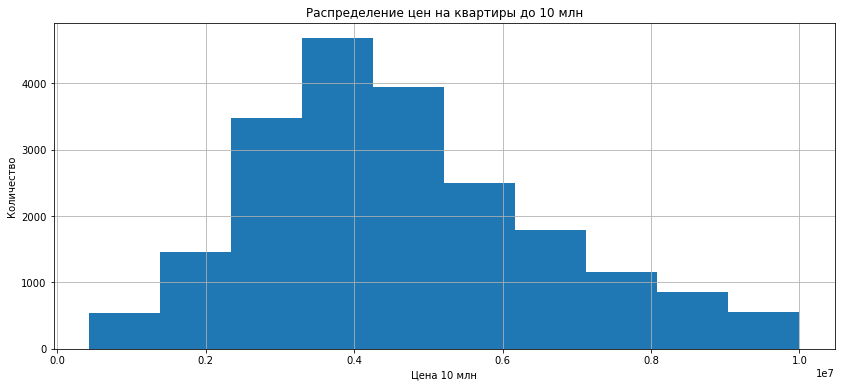

In [52]:
df.query('last_price < 10_000_000')['last_price'].hist(figsize=(14, 6))
plt.title("Распределение цен на квартиры до 10 млн")
plt.ylabel("Количество")
plt.xlabel("Цена 10 млн")

In [53]:
df['last_price'].value_counts().head(10)

4500000    342
3500000    291
4300000    260
4000000    260
4200000    259
3600000    257
3300000    244
3800000    240
3200000    238
3700000    234
Name: last_price, dtype: int64

Чаще всего встречаются цены в диапазоне 3.2 - 4.5 млн за квартиру

**Изучим число комнат**

In [54]:
df['rooms'].describe()

count   23,699.00
mean         2.07
std          1.08
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: float64

Text(0, 0.5, 'Комнаты')

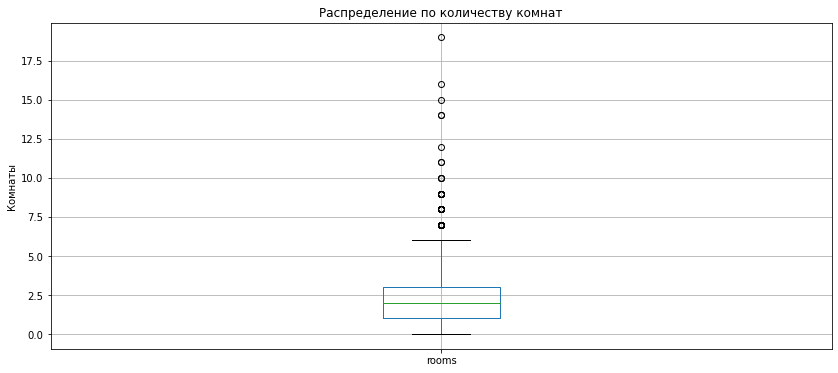

In [55]:
df.boxplot(column='rooms',figsize=(14,6))
plt.title("Распределение по количеству комнат")
plt.ylabel("Комнаты")

Text(0, 0.5, 'Количество квартир')

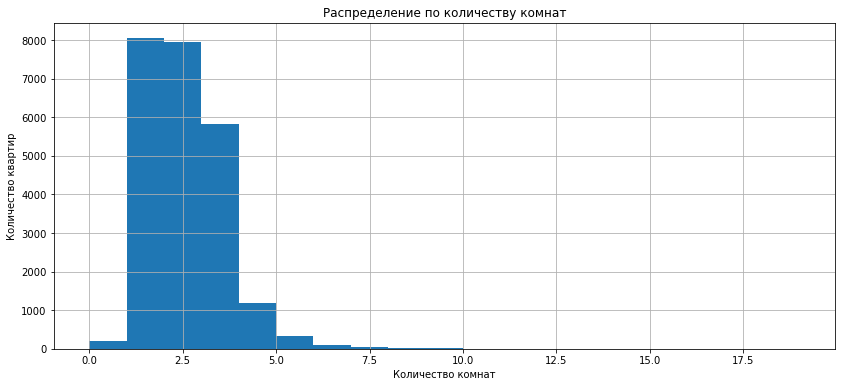

In [56]:
df['rooms'].hist(bins=19,figsize=(14,6))
plt.title("Распределение по количеству комнат")
plt.xlabel("Количество комнат")
plt.ylabel("Количество квартир")

In [57]:
df['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

Самые популярные однокомнатные квартиры, затем 2 комнаты 3 и тд, более 6 комнат можно отнести к выбросам.

**Изучим высоту потолков**

Text(0, 0.5, 'Метры')

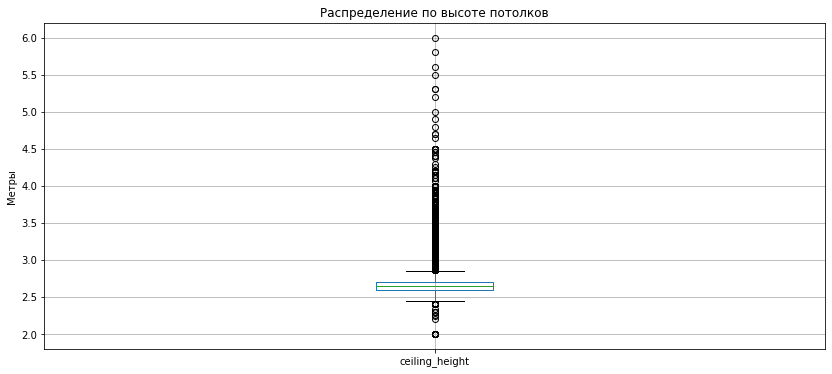

In [58]:
df.boxplot(column='ceiling_height',figsize=(14,6))
plt.title("Распределение по высоте потолков")
plt.ylabel("Метры")

Text(0, 0.5, 'Количество квартир')

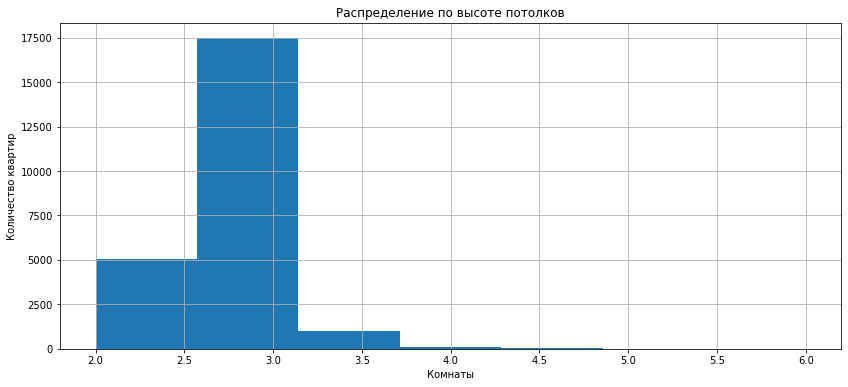

In [59]:
df['ceiling_height'].hist(bins=7,figsize=(14,6))
plt.title("Распределение по высоте потолков")
plt.xlabel("Комнаты")
plt.ylabel("Количество квартир")

In [60]:
df['ceiling_height'].value_counts().head(10)

2.65    9882
2.50    3522
2.60    1647
2.70    1582
3.00    1112
2.80     993
2.55     980
2.75     911
3.20     279
3.10     203
Name: ceiling_height, dtype: int64

Самые распространенное значение высоты потолка - 2.65 метра, что соответствует медиане.

**Время продажи квартиры**

In [61]:
df['days_exposition'].describe()

count   20,518.00
mean       180.89
std        219.73
min          1.00
25%         45.00
50%         95.00
75%        232.00
max      1,580.00
Name: days_exposition, dtype: float64

Среднее значение почти в 2 раза больше медианы, построим boxplot, и посмотрим на выбросы

Text(0, 0.5, 'Количество дней')

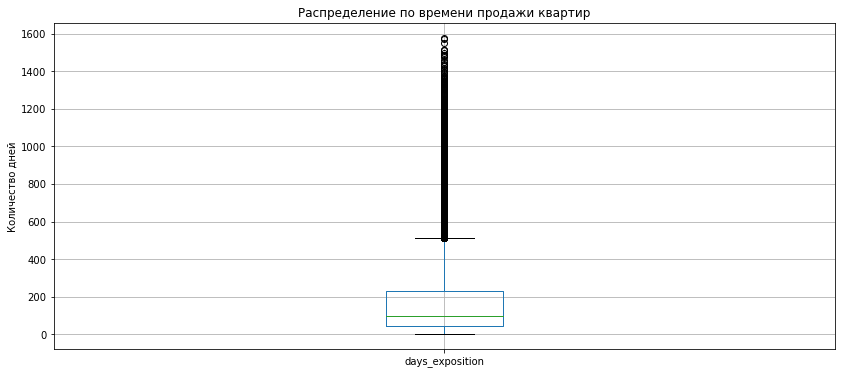

In [62]:
df.boxplot(column='days_exposition',figsize=(14,6))
plt.title("Распределение по времени продажи квартир")
plt.ylabel("Количество дней")

По графику видно, что выше 500 дней присутствуют выбросы. Построим гистограмму по значениям меньше 500 дней

Text(0, 0.5, 'Количество квартир')

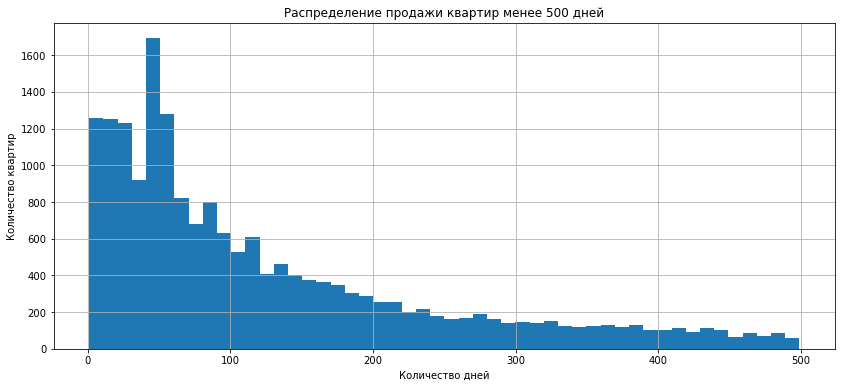

In [63]:
df.query('days_exposition < 500')['days_exposition'].hist(bins=50,figsize=(14,6))
plt.title("Распределение продажи квартир менее 500 дней")
plt.xlabel("Количество дней")
plt.ylabel("Количество квартир")

Пересчитаем описательные значения для количества дней менее 500

In [64]:
df.query('days_exposition < 500')['days_exposition'].describe()

count   18,764.00
mean       127.05
std        119.12
min          1.00
25%         41.00
50%         84.00
75%        181.00
max        499.00
Name: days_exposition, dtype: float64

Хотя медиана без выбросов снизилась с 95 до 84 дней, самая распространенная дата продажи 45 дней. Потому можно сказать, что продажу быстрее 41 дня(25 процентиль) можно назвать быстрой, а срок более 181 дня(75 процентиль) долгой. Выбросы более 500 дней необычно долгой.

**Зависимость цены от площади квартиры**

In [65]:
df['last_price'].corr(df['total_area'])

0.6537407142641287

Text(0, 0.5, 'Цена 10 млн.')

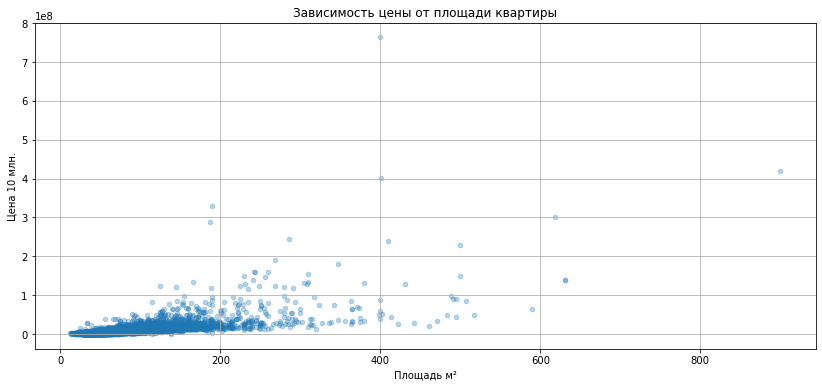

In [66]:
df.plot(x='total_area', y='last_price', kind='scatter', grid=True, alpha=0.3,figsize=(14,6))
plt.title("Зависимость цены от площади квартиры")
plt.xlabel("Площадь м²")
plt.ylabel("Цена 10 млн.")

Коэффициент Пирсона 0.65 говорит о том цена довольно сильно зависит от площади квартиры.

**Зависимость цены от числа комнат**

In [67]:
df['last_price'].corr(df['rooms'])

0.3633404525374845

Text(0, 0.5, 'Цена 10 млн.')

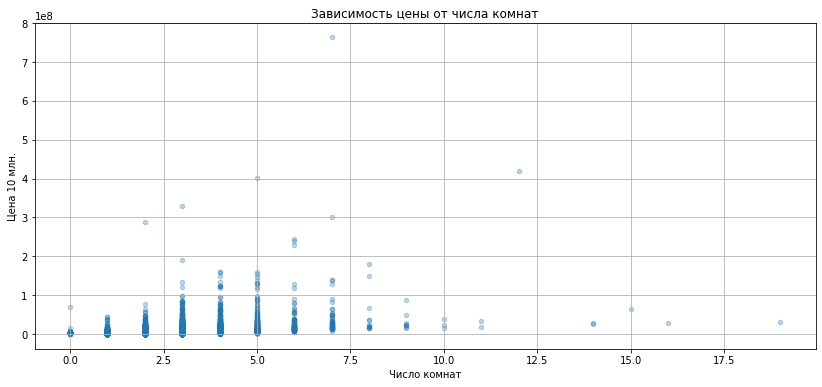

In [68]:
df.plot(x='rooms', y='last_price', kind='scatter', grid=True, alpha=0.3,figsize=(14,6))
plt.title("Зависимость цены от числа комнат")
plt.xlabel("Число комнат")
plt.ylabel("Цена 10 млн.")

Видим небольшую зависимость цены от количества комнат, что связано с предыдущим параметром площади квартиры.

**Зависимость цены от удалённости от центра**

In [69]:
df['last_price'].corr(df['city_сenters_nearest'])

-0.2070600005801343

Text(0, 0.5, 'Цена 10 млн')

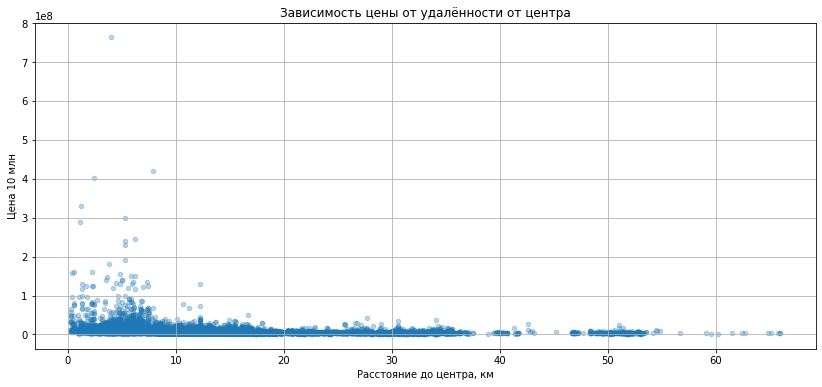

In [70]:
df.plot(x='city_сenters_nearest', y='last_price', kind='scatter', grid=True, alpha=0.3,figsize=(14,6))
plt.title("Зависимость цены от удалённости от центра")
plt.xlabel("Расстояние до центра, км")
plt.ylabel("Цена 10 млн")

Тут видим обратную зависимость, чем меньше расстояние от центра, тем больше цена квартиры.

**Зависимость цены от типа этажа**

In [71]:
df.groupby('floor_type')['last_price'].median()

floor_type
другой      4,850,000.00
первый      3,900,000.00
последний   4,350,000.00
Name: last_price, dtype: float64

Самая низкая цена на первые этажи, дороже последние и самая дорогая категория между ними.

**Зависимость цены от дня недели**

In [72]:
df.groupby('weekday')['last_price'].median()

weekday
0   4,650,000.00
1   4,730,000.00
2   4,700,000.00
3   4,650,000.00
4   4,585,000.00
5   4,555,000.00
6   4,550,000.00
Name: last_price, dtype: float64

Цена квартир снижается к концу недели.

**Зависимость цены от месяца**

In [73]:
df.groupby('month')['last_price'].median()

month
1    4,600,000.00
2    4,650,000.00
3    4,650,000.00
4    4,800,000.00
5    4,515,000.00
6    4,400,000.00
7    4,650,000.00
8    4,570,000.00
9    4,700,000.00
10   4,570,000.00
11   4,700,000.00
12   4,700,000.00
Name: last_price, dtype: float64

Самая высокая стоимость квартир в апреле, сентябре, ноябре и декабре. Самая низкая в мае.

**Зависимость цены от года**

In [74]:
df.groupby('year')['last_price'].median()

year
2014   7,700,000.00
2015   5,350,000.00
2016   4,550,000.00
2017   4,500,000.00
2018   4,550,000.00
2019   5,050,000.00
Name: last_price, dtype: float64

Самые высокие цены были в 2014 году, они снижались до 2017 года и затем опять начали расти.

Построим тепловую карту зависимости показателей другг отдруга

<AxesSubplot:>

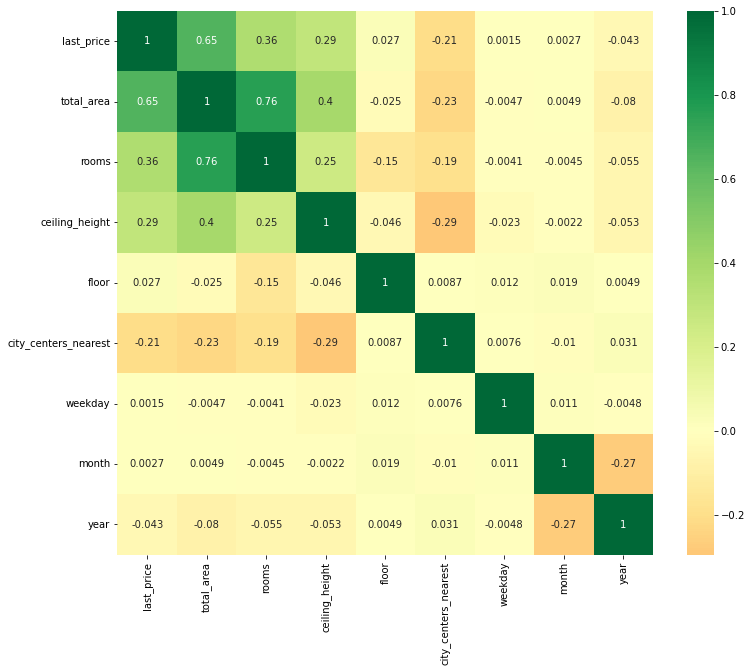

In [75]:
df_corr = (df[['last_price','total_area','rooms','ceiling_height','floor','city_сenters_nearest',
           'weekday','month','year'
           ]])

plt.figure(figsize=(12,10))
sns.heatmap(df_corr.corr(), xticklabels=df_corr.corr().columns,\
            yticklabels=df_corr.corr().columns, cmap='RdYlGn', center=0, annot=True)

**Вывод**

Цена квартиры сильно зависит от общей площади, которая в свою очередь зависит от количества комнат. Удаленность от центра имеет обратную зависимость, чем она больше, тем цена меньше. Остальные показатели мало коррелируются с ценой.

- Выберите 10 населённых пунктов с наибольшим числом объявлений.
- Посчитайте среднюю цену квадратного метра в этих населённых пунктах. 
- Выделите населённые пункты с самой высокой и низкой стоимостью жилья.

In [76]:
top_10 = df.pivot_table(index = 'locality_name', values = 'price_per_meter', aggfunc=['count', 'mean'])
top_10.columns = ['count', 'mean']
top_10 = top_10.sort_values('count', ascending = False).head(10)
top_10

,count,mean
locality_name,,
Санкт-Петербург,15747,"114,845.21"
посёлок Мурино,522,"85,751.73"
посёлок Шушары,440,"78,676.90"
Всеволожск,398,"68,654.01"
Пушкин,369,"103,125.37"
Колпино,338,"75,424.15"
посёлок Парголово,327,"90,175.49"
Гатчина,307,"68,745.69"
деревня Кудрово,299,"92,473.09"


In [77]:
#самая высокая стоимость
top_10[top_10['mean']==top_10['mean'].max()]

,count,mean
locality_name,,
Санкт-Петербург,15747,"114,845.21"


In [78]:
#самая низкая стоимость
top_10[top_10['mean']==top_10['mean'].min()]

,count,mean
locality_name,,
Выборг,237,"58,141.49"


- Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.

,price_per_meter
city_сenters_nearest,
0,"188,985.59"
1,"166,919.21"
2,"147,898.73"
3,"125,055.20"
4,"139,232.15"
5,"142,226.46"
6,"158,199.23"
7,"141,735.79"
8,"121,914.77"


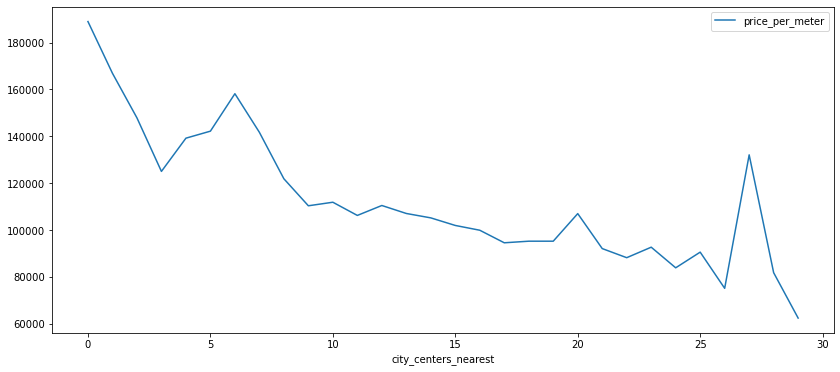

In [79]:
df_spb = df.query('locality_name == "Санкт-Петербург"').copy()
df_spb['city_сenters_nearest'] = df_spb['city_сenters_nearest'].astype(int)

city_center = df_spb.pivot_table(index = 'city_сenters_nearest', values = 'price_per_meter', aggfunc = 'mean')
city_center.plot(figsize=(14,6))
city_center

**Вывод**
График резко меняется после 7 км, определим его как центр.

- Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [80]:
df_spb_center = df_spb.query('city_сenters_nearest <= 7')

Text(0.5, 0, 'Площадь м²')

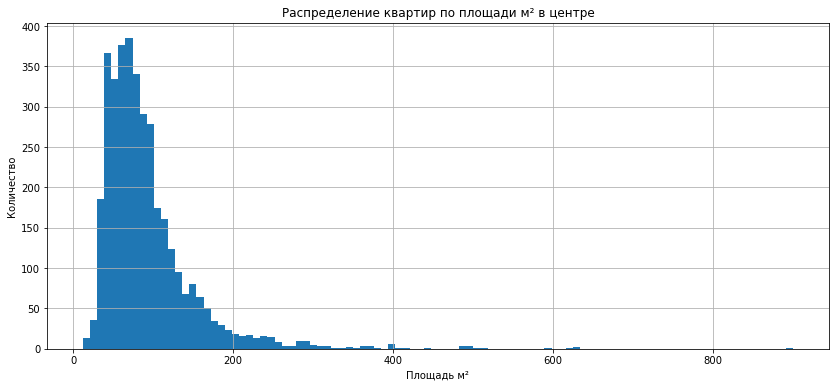

In [81]:
df_spb_center['total_area'].hist(bins=100,figsize=(14, 6))
plt.title("Распределение квартир по площади м² в центре")
plt.ylabel("Количество")
plt.xlabel("Площадь м²")

(0.0, 200.0)

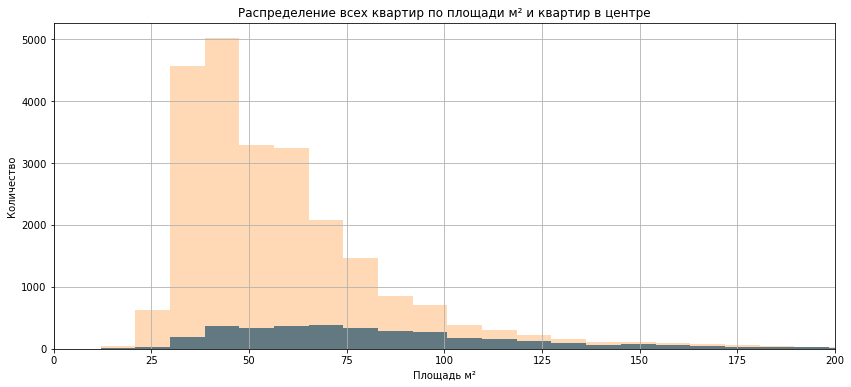

In [82]:
df_spb_center['total_area'].hist(bins=100,figsize=(14,6))


df['total_area'].hist(bins=100,alpha=0.3,figsize=(14, 6))
plt.title("Распределение всех квартир по площади м² и квартир в центре")
plt.ylabel("Количество")
plt.xlabel("Площадь м²")
plt.xlim(0,200)

In [83]:
df_spb_center['total_area'].describe()

count   3,693.00
mean       92.42
std        60.44
min        12.00
25%        56.00
50%        77.90
75%       109.00
max       900.00
Name: total_area, dtype: float64

Медианное значение общей площади для центра увеличилось с 52 до 85 метров

Text(0.5, 0, 'Цена 50 млн')

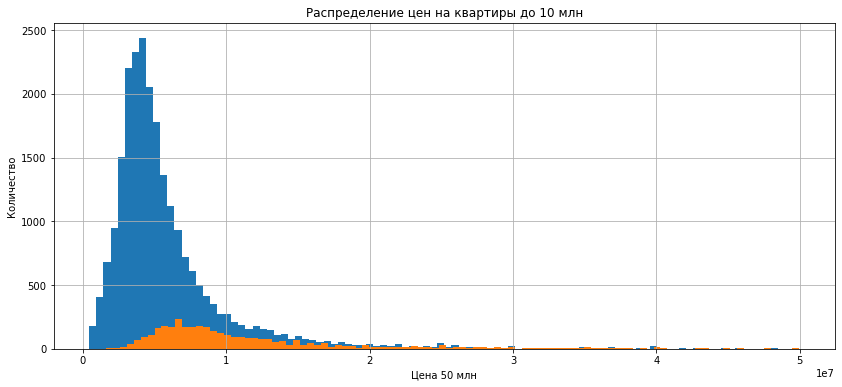

In [84]:
df.query('last_price < 50_000_000')['last_price'].hist(bins=100,figsize=(14, 6))


df_spb_center.query('last_price < 50_000_000')['last_price'].hist(bins=100,figsize=(14, 6))
plt.title("Распределение цен на квартиры до 10 млн")
plt.ylabel("Количество")
plt.xlabel("Цена 50 млн")

In [85]:
df_spb_center['last_price'].describe()

count         3,693.00
mean     14,748,679.57
std      24,762,936.39
min       1,600,000.00
25%       6,590,000.00
50%       9,000,000.00
75%      14,100,000.00
max     763,000,000.00
Name: last_price, dtype: float64

In [86]:
df['last_price'].describe()

count        23,699.00
mean      6,542,062.62
std      10,886,992.47
min         430,000.00
25%       3,400,000.00
50%       4,650,000.00
75%       6,800,000.00
max     763,000,000.00
Name: last_price, dtype: float64

Цены на квартиры в центре больше чем в других районах. Так медианное значение цены квартиры всего составляет 4.65 млн, в центре - 9.5 млн, что более чем в 2 раза больше.

**Изучим число комнат в центре**

In [87]:
df_spb_center['rooms'].describe()

count   3,693.00
mean        2.82
std         1.44
min         0.00
25%         2.00
50%         3.00
75%         3.00
max        19.00
Name: rooms, dtype: float64

In [88]:
df_spb_center['rooms'].value_counts()

3     1148
2     1095
1      550
4      503
5      218
6       84
7       54
0       18
8       11
9        3
11       2
10       2
15       1
19       1
16       1
12       1
14       1
Name: rooms, dtype: int64

Колиество комнат в квартирах в центре больше чем в других районах. В центре на первом месте квартиры 3 комнатами в отличие от остальных районов где на первом месте однокомнатные квартиры.

**Изучим высоту потолков в центре**

Text(0, 0.5, 'Количество квартир')

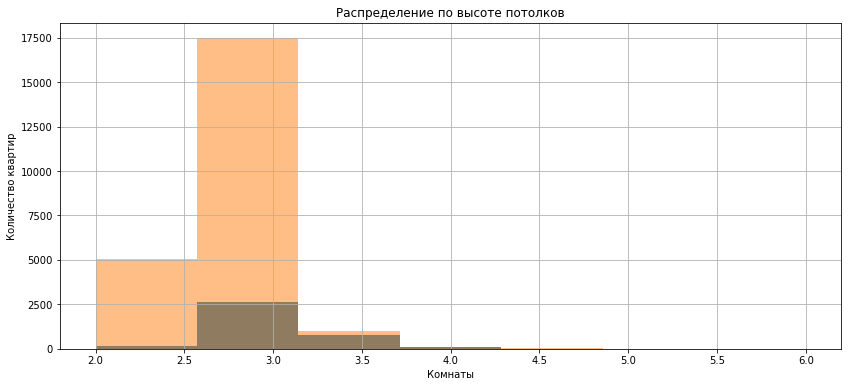

In [89]:
df_spb_center['ceiling_height'].hist(bins=7,figsize=(14,6))

df['ceiling_height'].hist(bins=7,figsize=(14,6),alpha=0.5)
plt.title("Распределение по высоте потолков")
plt.xlabel("Комнаты")
plt.ylabel("Количество квартир")


In [90]:
df_spb_center['ceiling_height'].value_counts(normalize=True).mul(100).head(10)

2.65   35.88
3.00   12.84
3.20    5.06
2.70    3.49
2.80    3.38
2.50    3.28
3.10    3.11
3.50    2.92
3.30    2.52
3.40    2.22
Name: ceiling_height, dtype: float64

In [91]:
df['ceiling_height'].value_counts(normalize=True).mul(100).head(10)

2.65   41.70
2.50   14.86
2.60    6.95
2.70    6.68
3.00    4.69
2.80    4.19
2.55    4.14
2.75    3.84
3.20    1.18
3.10    0.86
Name: ceiling_height, dtype: float64

Хотя в центре первом месте так же стоят квартиры с высотой потолка 2.65 метра, но на них и ниже приходится около 36% квартир другие значения выше. В остальных района около 70% приходится на квартиры 2.65 метра и ниже.

<AxesSubplot:>

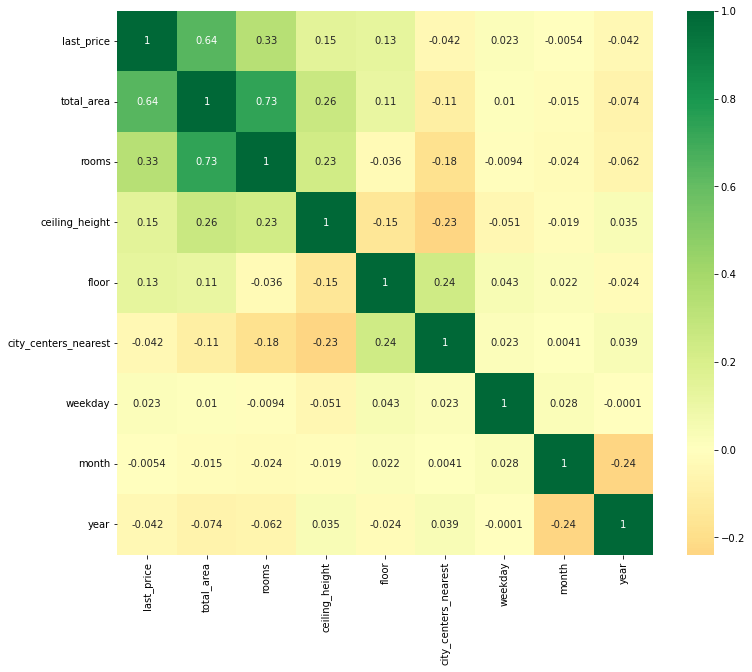

In [92]:
df_corr = (df_spb_center[['last_price','total_area','rooms','ceiling_height','floor','city_сenters_nearest',
           'weekday','month','year'
           ]])
plt.figure(figsize=(12,10))
sns.heatmap(df_corr.corr(), xticklabels=df_corr.corr().columns,\
            yticklabels=df_corr.corr().columns, cmap='RdYlGn', center=0, annot=True)

В целом можно сказать, чтоквартиры в центре дороже, больше площадью, больше комнат и выше потолки.

## Общий вывод

В процессе выполнения проекта изучили данные о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. В таблице представлено 364 населенных пункта, часть относятся к районам Санкт-Петербурга часть к Ленинградской области. На Санкт-Петербург приходится 15747(66,4%) строк таблицы.

Значительные пропуски в данных относятся к описательной части объекта недвижимости:
- квартира или апартаменты - 88%, 
- наличие балкона - 48%, 
- высота потолка - 39%, значения меньше 2 м на медиану
Так же значительная часть пропусков обнаружилась в значениях локации квартир: удаленность от центра , аэропорта или наличия рядом парков и водоёмов.
По возможности пропуски были заменены на медианные значения. Значительная часть пропусков осталась не заполнена, но эти пропуски в основном относятся к объектам недвижимости Ленинградской области, где расстояние до центра и до аэропорта видимо не столь актуально.

Пропуски в колонке `living_area` были заменены пропорционально количеству комнат и долю жилой площади в размере общей площади.

Также частично были изменены типы данных, метры заменены на километры с округлением до десятых долей. Это поможет сэкономить расчетные ресурсы и более понятно для восприятия информации.

Сильно на разброс данных повлияли выбросы. При рассмотрении значения цены были обнаружены неординарные значения минимальной и максимальной цены. 
Значение минимальной цены было исправлено как ошибка заполнения, максимальные цены видимо реальны. Медиана цены приходится на 4.65 млн, а среднее значение на 6.54 млн. Показатели сильно отличаются, что является результатом выбросов, например максимальная цена 763 млн.
Например, выявлено 6 квартир с ценой более 250 млн. и максимальная цена составляет 763 млн.

Важными параметрами, из которых складывается стоимость квартиры это площадь и месторасположение. Чем больше площадь и ближе к центру локация, тем дороже объект недвижимости.

При продаже квартиры стоит ориентироваться на точность заполнения данных и время подачи объявления, так как явно прослеживается сезонная активность покупателей. В среднем при адекватной оценке стоимости квартиры срок продаж должен уложиться в 2-3 месяца. Квартиры в центре города стоят дороже. Это обусловлено большей средней площадью, большим количеством комнат, большей стоимости квадратного метра. В свою очередь квартиры в городе дороже чем квартиры в области.
